# Business Problem
In this project, I have been tasked with analyzing aviation accident data to determine which aircraft are the least risky. My goal is to provide clear, data-driven insights that can help the head of the new aviation division make informed decisions about which aircraft models to purchase.

---

## Goal

I will:

- Explain the steps I took to explore and analyze the data
- Identify which aircraft types tend to be involved in the fewest and/or least severe accidents
- Visualize important patterns and trends in aviation accident history
- Use these insights to recommend aircraft models that appear to be lower risk

---
## Import Library and load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = '../Data/Aviation_Data.csv'
df = pd.read_csv(file_path,low_memory=False,encoding= 'latin_1')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

**Filtering**  
- Retained only the columns relevant for risk analysis.

**Handling missing values**  
- Removed rows with missing values in `'Make'`, `'Event.Date'`, and `'Model'`  
- Replaced `NaN` values in injury-related columns with `0`  
- Replaced `NaN` values in `'Aircraft.damage'` and `'Broad.phase.of.flight'` with `'Unknown'`

**New column creation**  
- Extracted `'Event.Year'` from `'Event.Date'`

**Export**  
- Saved the cleaned data to `'AviationData.csv'` for use after on powerBI for interactive vizualisations


In [16]:
# # Filter the DataFrame to include only rows where 'Aircraft.Category' is 'Airplane' & Select relevant columns 
df = df[['Event.Date','Model','Make','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight']]

# Cleaning the 'Make' and 'weather Condition' column by converting to title case
df.loc[:,'Make'] = df['Make'].str.title()

#Percentage of missing values in dataset
df[['Event.Date','Model','Make','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight']].isnull().mean() * 100


Event.Date                 1.614867
Model                      1.716695
Make                       1.684597
Aircraft.damage            5.150086
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Broad.phase.of.flight     31.681941
dtype: float64

In [17]:
# Dropping rows with missing values in 'Make', 'Model', and 'Weather.Condition' columns
df = df.dropna(subset = ['Make','Event.Date','Model'])

# Filling missing values in the specified columns
df.loc[:, "Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(0)
df.loc[:, "Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(0)
df.loc[:, "Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(0)
df.loc[:, "Total.Uninjured"] = df["Total.Uninjured"].fillna(0)
df.loc[:, "Aircraft.damage"] = df["Aircraft.damage"].fillna('Unknown')
df.loc[:, "Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna('Unknown')

In [18]:
df.loc[:,'Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year.astype('Int64')
df['Event.Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
90343    2022
90344    2022
90345    2022
90346    2022
90347    2022
Name: Event.Year, Length: 88777, dtype: Int64

In [19]:
#Save df in csv file for further analysis on powerbi
df.to_csv('AviationData.csv')

### Data Analysis

**Statistics by year**  
- Number of accidents and distribution of injuries *(fatal, serious, minor, uninjured)* from **1948 to 2022**  


In [20]:
# Number of accidents per year
nbr_acc_yr = pd.DataFrame({'Year' : df['Event.Year'].value_counts().sort_index().index, 'Number_of_Accidents' : df['Event.Year'].value_counts().sort_index().values})

nbr_acc_yr = df.groupby('Event.Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum().reset_index().sort_values(by = 'Event.Year',ascending= True).astype('int')
nbr_acc_yr.head()

,Event.Year,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948,2,0,0,0
1,1962,4,0,0,0
2,1974,3,0,0,0
3,1977,2,0,0,0
4,1979,1,2,1,44


## Data Vizualisation 

### Yearly Evolution of Injuries

### Description
This two-panel line chart shows:
- **Top panel**: Number of injuries per year, broken down into:
  - Fatal injuries (`Total.Fatal.Injuries`)
  - Serious injuries (`Total.Serious.Injuries`)
  - Minor injuries (`Total.Minor.Injuries`)
- **Bottom panel**: Number of uninjured individuals (`Total.Uninjured`) per year.

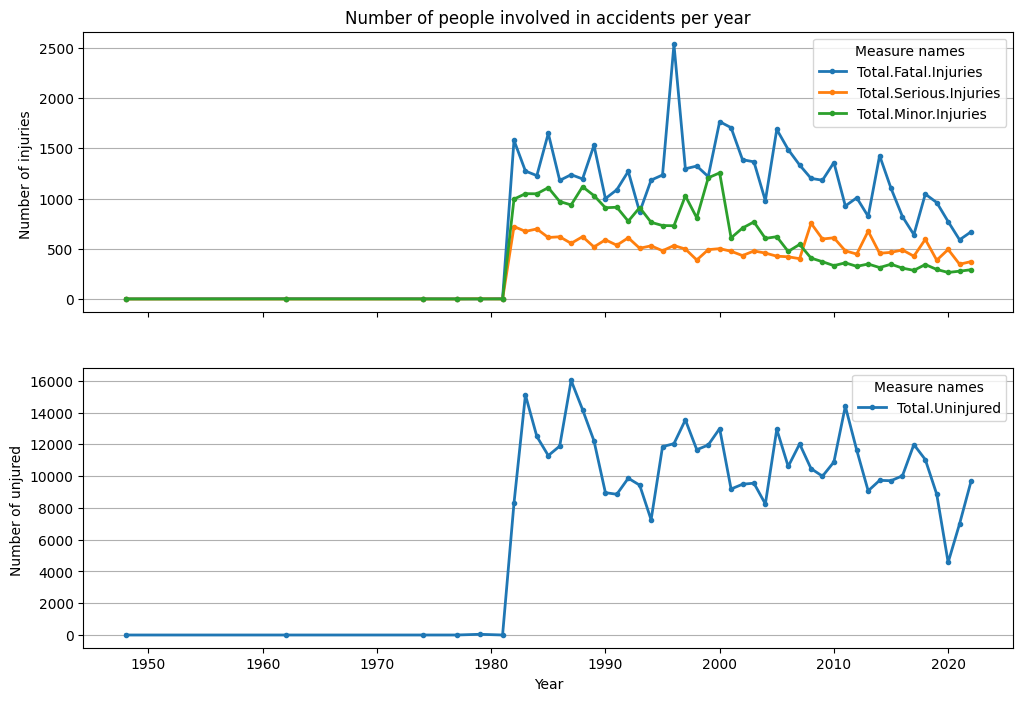

In [ ]:
# Plot the number of people involved in accidents per year
fig, (ax,ax2) = plt.subplots(2,1, sharex=True ,figsize = (12,8))
x = nbr_acc_yr['Event.Year']
y = nbr_acc_yr['Total.Fatal.Injuries']
data = nbr_acc_yr[['Event.Year','Total.Fatal.Injuries']]
ax.set_title("Number of people involved in accidents per year")
ax.plot(x,y,lw=2,marker = '.',label = 'Total.Fatal.Injuries')
ax.plot(x,nbr_acc_yr['Total.Serious.Injuries'],lw=2,marker = '.',label = 'Total.Serious.Injuries')
ax.plot(x,nbr_acc_yr['Total.Minor.Injuries'],lw=2,marker = '.',label = 'Total.Minor.Injuries')
ax.legend(title = ('Measure names'))
ax.set_ylabel("Number of injuries ")
ax.grid(axis= 'y') # Add grid lines to the y-axis

ax2.plot(x,nbr_acc_yr['Total.Uninjured'],lw=2,marker = '.',label = 'Total.Uninjured')
ax2.legend(title = ('Measure names'))
ax2.set_ylabel("Number of unjured ")
ax2.grid(axis= 'y') # Add grid lines to the y-axis
ax2.set_xlabel("Year")
plt.show()

### Interpretation 

- One can notice a strong interannual variability in the number of people injured in accidents from 1982 to 2022. This variability is particularly pronounced for fatal injuries, with significantly high peaks around 1985 and a gradual decline afterward. For serious and minor injuries, it can be observed that they follow an almost similar trend, but these injuries decrease over the years. Overall, fatal injuries are mostly higher than serious and minor injuries but decrease progressively, while the number of uninjured individuals generally increases compared to serious and fatal injuries.

---


## Aircraft Damage and Phase of Flight Distribution

### Description
This combined visualization includes:
- **Left**: A pie chart showing the distribution of aircraft damage (`Aircraft.damage`) types: `Destroyed`, `Substantial`, `Minor`, and `Unknown`.
- **Right**: A horizontal bar chart showing the percentage distribution of accidents by flight phase (`Broad.phase.of.flight`).

Proportion of different aircraft damages from 1948 to 2022 in a pie chart

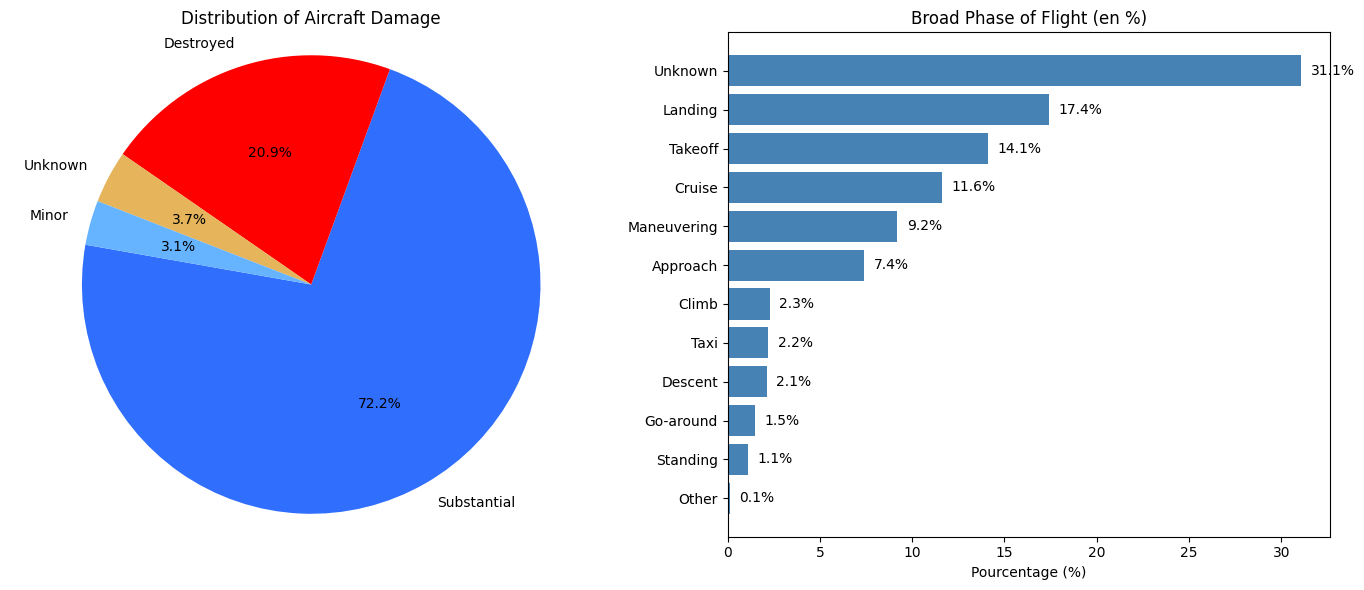

In [ ]:
# Aircraft Damage pie chart data
aircraft_damage = df['Aircraft.damage'].value_counts()
labels_damage = aircraft_damage.index

# Broad Phase of Flight bar chart data (en pourcentages)
broad_phase_flight_counts = df['Broad.phase.of.flight'].value_counts()

total_flights = broad_phase_flight_counts.sum()
broad_phase_flight_percent = (broad_phase_flight_counts / total_flights * 100).round(1)

# Color map for pie chart
color_map = {
    'Destroyed': '#ff0000',
    'Minor': '#66b3ff',
    'Substantial': "#306efe",
    'Unknown': "#E5B45B"
}
colors_damage = [color_map.get(label, "#%06x" % np.random.randint(0, 0xFFFFFF)) for label in labels_damage]

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: Aircraft Damage
axes[0].pie(aircraft_damage, labels=labels_damage, autopct='%1.1f%%',
            startangle=170, colors=colors_damage)
axes[0].set_title('Distribution of Aircraft Damage')
axes[0].axis('equal')

# Bar chart: Broad Phase of Flight (in %)
axes[1].barh(broad_phase_flight_percent.index, broad_phase_flight_percent.values, color='#4682B4')
axes[1].set_title('Broad Phase of Flight (en %)')
axes[1].invert_yaxis()  # Pour voir la phase la plus fréquente en haut
axes[1].set_xlabel('Pourcentage (%)')

# Annotate the bar chart with percentage values
for i, (value, label) in enumerate(zip(broad_phase_flight_percent.values, broad_phase_flight_percent.index)):
    axes[1].text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


### Interpretation 

- Regarding the number of accidents recorded over the years, we observe that most aircraft either sustain **substanciel**  damage (72.2%) or are **destroyed** (20.9%). Only 3.1% of incidents result in minor damage, while 3.7% remain of unknown severity.

- Critical flight phases such as **landing** and **takeoff** present the highest accident risks, accounting for 17.4% and 14.1% of incidents, respectively.

## Top 20 Aircraft Makes/Model involved in accidents

### Description
A horizontal bar chart listing the top 20 `Make / Model` combinations most frequently involved in accidents.

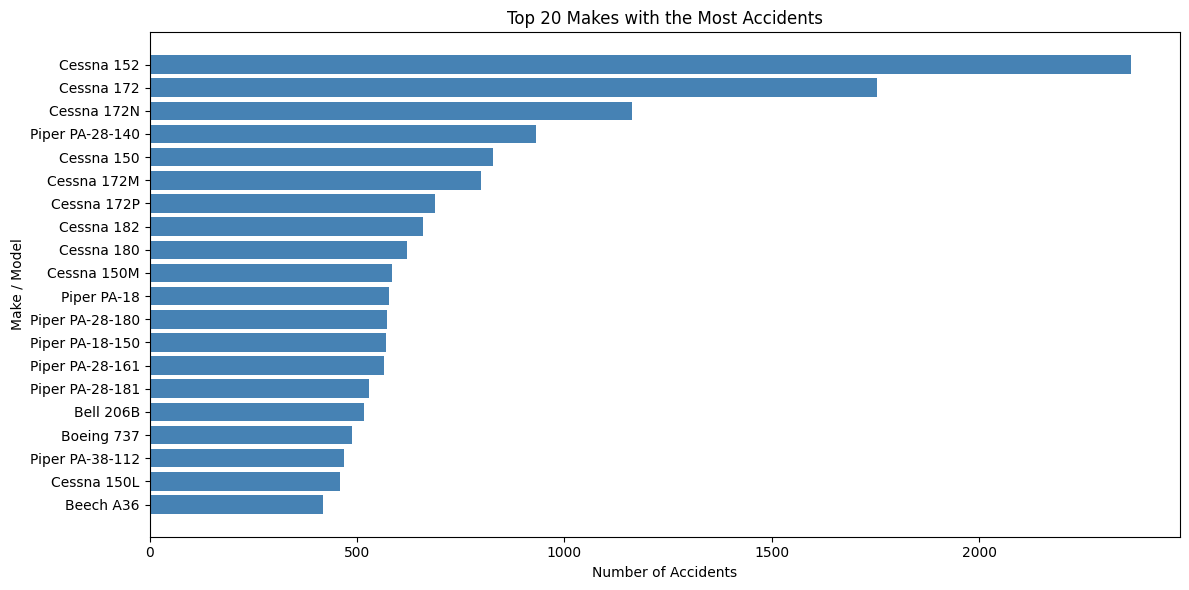

In [23]:
df2 = df[['Make','Model','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Aircraft.damage']].copy()
df2['Make_Model'] = df2['Make'] + ' ' + df2['Model']
df2 = df2.drop(columns=['Make'])
top_20_makes = df2['Make_Model'].value_counts().head(20)
df2_top = df2[df2['Make_Model'].isin(top_20_makes.index)]

# Plotting the top 20 makes with the most accidents

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_20_makes.index, top_20_makes.values, color='#4682B4')
ax.set_xlabel('Number of Accidents')    
ax.set_ylabel('Make / Model')
ax.set_title('Top 20 Makes with the Most Accidents')
ax.invert_yaxis() # Invert y-axis to have the most frequent at the top
plt.tight_layout()
plt.show()

### Interpretation

- It can be considered that the brands and models `(Cessna, Piper, and Bell)` that frequently appear are probably the most commonly used in general or commercial aviation, hence the fact that they have a good number of accidents attributed to them.

- Furthermore, their high number does **not necessarily mean lower safety or a higher risk of danger**, but may simply reflect a larger fleet size or a higher flight frequency.


---

## Search safety aircraft

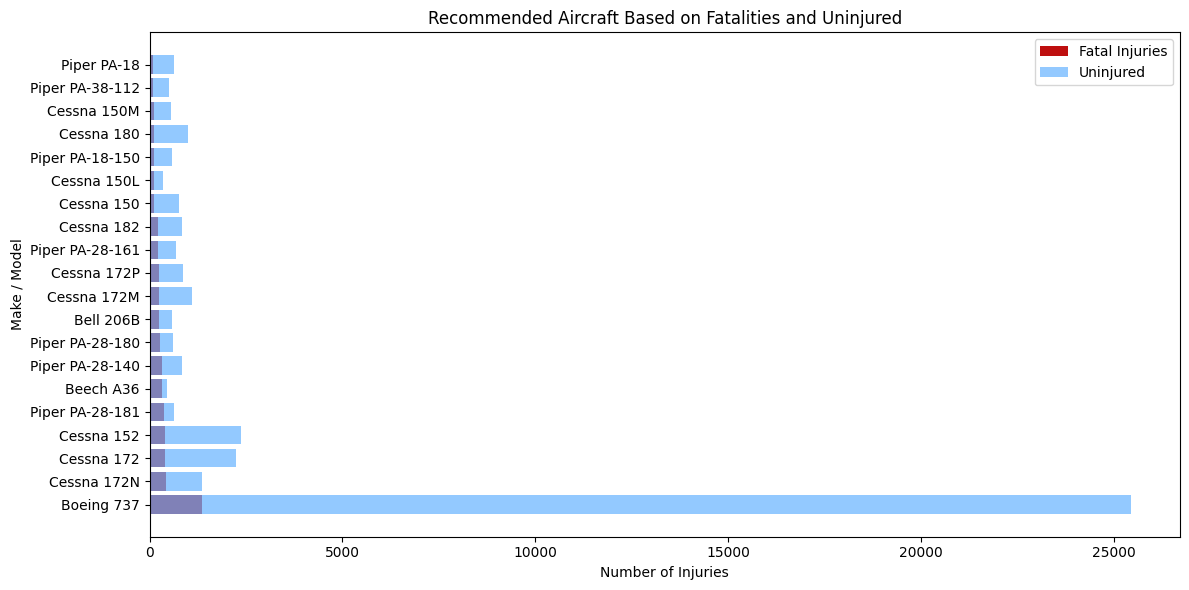

In [ ]:
# Grouping by Make_Model and summing the injuries 
recommended_aircraft = df2_top[['Make_Model','Total.Fatal.Injuries','Total.Uninjured']].groupby('Make_Model').sum().reset_index().sort_values(
    by = ['Total.Fatal.Injuries','Total.Uninjured'],ascending= [True, True]
    )
# recommended_aircraft

#Recommended Aircraft Based on fatalities and Uninjured
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(recommended_aircraft['Make_Model'], recommended_aircraft['Total.Fatal.Injuries'], color="#BE0F0F", label='Fatal Injuries')
ax.barh(recommended_aircraft['Make_Model'], recommended_aircraft['Total.Uninjured'], color='#66b3ff', label='Uninjured', alpha=0.7)
ax.set_xlabel('Number of Injuries')
ax.set_ylabel('Make / Model')
ax.set_title('Recommended Aircraft Based on Fatalities and Uninjured')
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Aircraft Safety Recommendations for the company

Based on my analysis of historical accident data and aircraft status, I recommend the following **three aircraft models** as the safest and most viable options for commercial and private aviation operations. Our selection combines **low fatality ratios**, **ongoing active service**, and **favorable reputations**, supported by both **data** and **external research**.

---

### 1. Boeing 737 — Commercial Backbone with Ongoing Oversight

- **Fatality Rate:** 4.9% (1,348 fatalities out of 27,268 total people involved)
- **Current Use:** Actively in service worldwide; thousands of units operating in commercial fleets
- **Reputation:** Reliable platform, but recent manufacturing quality concerns (e.g., MAX-9 door plug, FAA audits)

**Justification:**
- The 737 family has the **highest number of uninjured occupants**, showing strong survivability in incidents.
- Despite recent scrutiny (MAX series), it remains the **most widely used narrow-body jet**.
- Safety can be enhanced through:
  - Compliance with FAA quality directives  
  - Enhanced **crew training** for trim and runway events  
  - Adoption of modern cockpit alerting systems (e.g., AoA and terrain awareness)

**Recommendation:**  
Continue 737 operations for commercial use with **rigorous inspection protocols** and **training upgrades** in place.

---

### 2. Cessna 180 — Reliable Choice for Utility and Bush Operations

- **Fatality Rate:** 8.3% (103 fatalities out of 1,241 total people involved)
- **Current Use:** Still flown by private operators, charter companies, and bush pilots
- **Reputation:** Durable, STOL-capable, and respected for rugged off-airport performance

**Justification:**
- The C-180 is ideal for operations in **remote areas** and **rough-field conditions**.
- Known issues (e.g., tailwheel ground loops, stabilizer bracket corrosion) can be mitigated with:
  - **Advanced tailwheel training**
  - **Routine structural inspections**
  - Avionics upgrades: **ADS-B**, **AoA indicators**

**Recommendation:**  
Promote the Cessna 180 for **charter, utility, and survey missions**, with safety-focused pilot training and maintenance protocols.

---

### 3. Piper PA-18 Super Cub — Safe for Private and Introductory Flying

- **Fatality Rate:** 9.9% (88 fatalities out of 890 total people involved)
- **Current Use:** Active in training, banner towing, glider towing, and recreational flying
- **Reputation:** Stable at low speeds, forgiving in emergency landings, but structurally vulnerable in older airframes

**Justification:**
- The PA-18 performs well in **low-speed, low-altitude environments**, which reduces the severity of accidents.
- FAA reports identify **rudder post** and **landing gear stress** issues in older variants.
- Safety can be boosted with:
  - **Four-point harnesses**
  - **Modern ELTs**
  - Optional **ballistic parachutes** (BRS)

**Recommendation:**  
Use the PA-18 for **training and private operations**, ensuring structural integrity and integrating modern safety systems.

**Table choice**

| Aircraft Model | Fatality Rate | Use Case              | Key Strength                   |
|----------------|----------------|------------------------|--------------------------------|
| Boeing 737     | 4.9%           | Commercial             | High survivability, global support |
| Cessna 180     | 8.3%           | Bush/Utility Missions  | STOL capability, rugged        |
| Piper PA-18    | 9.9%           | Private/Training       | Stability at low speed         |
